In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sat May  9 22:45:00 2020

@author: rmallik
reference:
    #https://github.com/dgoldman0/socialdistancing
    #ref https://github.com/tirthajyoti/Covid-19-analysis/blob/master/Notebook/SEIR-demo.ipynb    
"""

import numpy as np
import matplotlib.pyplot as plt

## why SEIR model 


### Before that lets understand some SIER model and notation,


https://en.wikipedia.org/wiki/File:SEIR.PNG

**Assuming the presence of vital dynamics with birth rate  ${\displaystyle \Lambda }$ equal to death rate${\displaystyle \mu }$, the following equation represnt - SIER model <br>**
${\displaystyle {\begin{aligned}{\frac {dS}{dt}}&=\mu N-\mu S-\beta {\frac {I}{N}}S\\[8pt]{\frac {dE}{dt}}&=\beta {\frac {I}{N}}S-(\mu +a)E\\[8pt]{\frac {dI}{dt}}&=aE-(\gamma +\mu )I\\[8pt]{\frac {dR}{dt}}&=\gamma I-\mu R.\end{aligned}}}$

We have  ${\displaystyle S+E+I+R=N,}$  but this is only constant because of the (degenerate) assumption that birth and death rates are equal; in general ${\displaystyle N}$is a variable.

For this model, the basic reproduction number is:

${\displaystyle R_{0}={\frac {a}{\mu +a}}{\frac {\beta }{\mu +\gamma }}.} $


where,<br>
N is the total population<br>
S for the number of susceptible,<br>
E  the individual is in incubation period, or has been explosed <br>
I for the number of infectious, and <br>
R for the number of recovered or deceased (or immune) individuals.<br>

β is the average number of contacts per person per time, <br>
If typical time between contacts is ${\displaystyle T_{c}}$, then ${\displaystyle T_{c} =\beta ^{-1}}$, <br><br>
$\gamma$ inverse of typical time until recovered or removal<br>
If an individual is infectious for a time period ${\displaystyle T_{r}}$ then  ${\displaystyle T_{r}=\gamma ^{-1}}$<br><br>
${\displaystyle {\alpha}}$  is the average incubation period ,
incubation period during which individuals have been infected but are not yet infectious themselves. 
incubation period is a random variable with exponential distribution<br><br>
$\rho$ which represents the social mixing. The higher the 𝜌 the less social distancing. It can have a value from 0 to 1.

in a simpler sinario
${\displaystyle R_{0}}$ basic reproduction number:${\displaystyle R_{0}    ={\frac {\beta }{\gamma }}}$<br>



ref:https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

# Corona covid-19 is a type of  infections,where  there is a significant incubation period during which individuals have been infected but are not yet infectious themselves. During this period the individual is in compartment E (for exposed).So a SIER type model makes sense

Assuming that the incubation period is a random variable with exponential distribution 
The incubation period of the virus is the time between the exposure and the display of symptoms. Current information suggests that the incubation period ranges from 1 to 12.5 days (with median estimates of 5 to 6 days), but can be as long as 14 days

In [6]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma ,rho = params
    dt = t[1] - t[0]
    for k in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

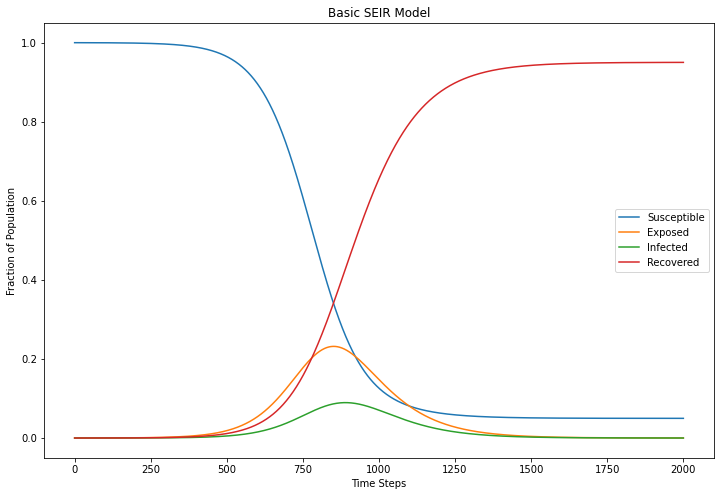

In [23]:
# Define parameters
t_max = 100
dt = .05
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho = 0.9
params = [alpha, beta, gamma,rho]

# Run simulation
results = seir_model_with_soc_dist(init_vals, params, t)
# Plot results
plt.figure(figsize=(12,8))
plt.plot(results)
plt.title('Basic SEIR Model')
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
plt.xlabel('Time Steps')
plt.ylabel('Fraction of Population')
plt.show()

# what will happen to infetcion count if we play with different social distance (rho) value

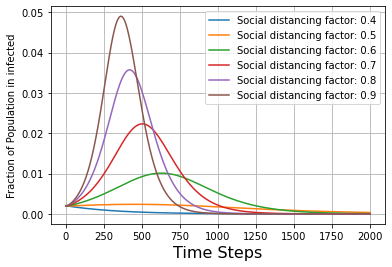

In [33]:
#palying with difefrent social distancing
soc_d=[.4,.5,.6,.7,.8,.9]
for d in soc_d:
    params[-1]=d
    result=seir_model_with_soc_dist(init_vals,params , t)
    plt.plot(result[:,2])
plt.legend(["Social distancing factor: "+str(d) for d in soc_d], fontsize=10)
plt.xlabel('Time Steps',fontsize=16)
plt.ylabel('Fraction of Population in infected',fontsize=10)
plt.grid(True)


# what happens with early opening of lockdown measures, which aim to reduce social mixing i.e. increase social distancing.
lets assume initially social mixing rho value was .4(less social mixing ) and later due to opening of lockdown increaded to .9. Lets obserb the infected fraction popultaion in together.

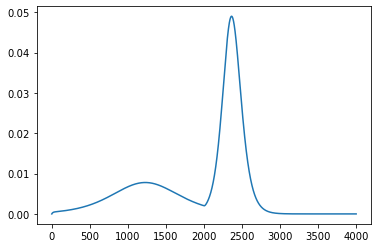

In [34]:
params=[0.7,2.1,0.7,0.1]
init_vals=[0.999, 0.001, 0, 0]
params[-1]=.4
initial_result=seir_model_with_soc_dist(init_vals,params , t)
final_val=initial_result[-1]
init_vals=final_val
params[-1]=.9
final_result=seir_model_with_soc_dist(init_vals,params , t)
r3=np.vstack((initial_result,final_result))
plt.plot(r3[:,2])

# Conclusion shows increase in infected population